# 

In [1]:
#import libraries
!pip install vaderSentiment
import pandas as pd
import numpy as np
import scipy
import math
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split 
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.naive_bayes import MultinomialNB 
from sklearn.ensemble import RandomForestClassifier  
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import GridSearchCV
from time import time

In [2]:
#load the dataset
test_data = pd.read_csv('drugsComTest_raw.tsv',sep='\t')
train_data = pd.read_csv('drugsComTrain_raw.tsv',sep='\t')
train_data.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37


In [3]:
#merge the dataset for analysis
drug_data = pd.concat([train_data,test_data])
drug_data.shape

(215063, 7)

Explaining Variables


In [4]:
#rename unamed column to ID
drug_data.rename(columns = {'Unnamed: 0':'ID'},inplace=True)
drug_data.head()

,ID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37


In [5]:
drug_data['ID'].nunique()

215063

In [6]:
drug_data.describe(include='all')

,ID,drugName,condition,review,rating,date,usefulCount
count,215063.000000,215063,213869,215063,215063.000000,215063,215063.000000
unique,NaN,3671,916,128478,NaN,3579,NaN
top,NaN,Levonorgestrel,Birth Control,"""Good""",NaN,"March 1, 2016",NaN
freq,NaN,4930,38436,39,NaN,185,NaN
mean,116039.364814,NaN,NaN,NaN,6.990008,NaN,28.001004
std,67007.913366,NaN,NaN,NaN,3.275554,NaN,36.346069
min,0.000000,NaN,NaN,NaN,1.000000,NaN,0.000000
25%,58115.500000,NaN,NaN,NaN,5.000000,NaN,6.000000
50%,115867.000000,NaN,NaN,NaN,8.000000,NaN,16.000000
75%,173963.500000,NaN,NaN,NaN,10.000000,NaN,36.000000


In [7]:
drug_data.describe(include='all')

,ID,drugName,condition,review,rating,date,usefulCount
count,215063.000000,215063,213869,215063,215063.000000,215063,215063.000000
unique,NaN,3671,916,128478,NaN,3579,NaN
top,NaN,Levonorgestrel,Birth Control,"""Good""",NaN,"March 1, 2016",NaN
freq,NaN,4930,38436,39,NaN,185,NaN
mean,116039.364814,NaN,NaN,NaN,6.990008,NaN,28.001004
std,67007.913366,NaN,NaN,NaN,3.275554,NaN,36.346069
min,0.000000,NaN,NaN,NaN,1.000000,NaN,0.000000
25%,58115.500000,NaN,NaN,NaN,5.000000,NaN,6.000000
50%,115867.000000,NaN,NaN,NaN,8.000000,NaN,16.000000
75%,173963.500000,NaN,NaN,NaN,10.000000,NaN,36.000000


In [8]:
#change data format for date to date&time
drug_data['date'] = pd.to_datetime(drug_data['date'])

In [9]:
#check the number of Drugs
drug_data['drugName'].nunique()

3671

In [10]:
#number of conditions
drug_data['condition'].nunique()

916

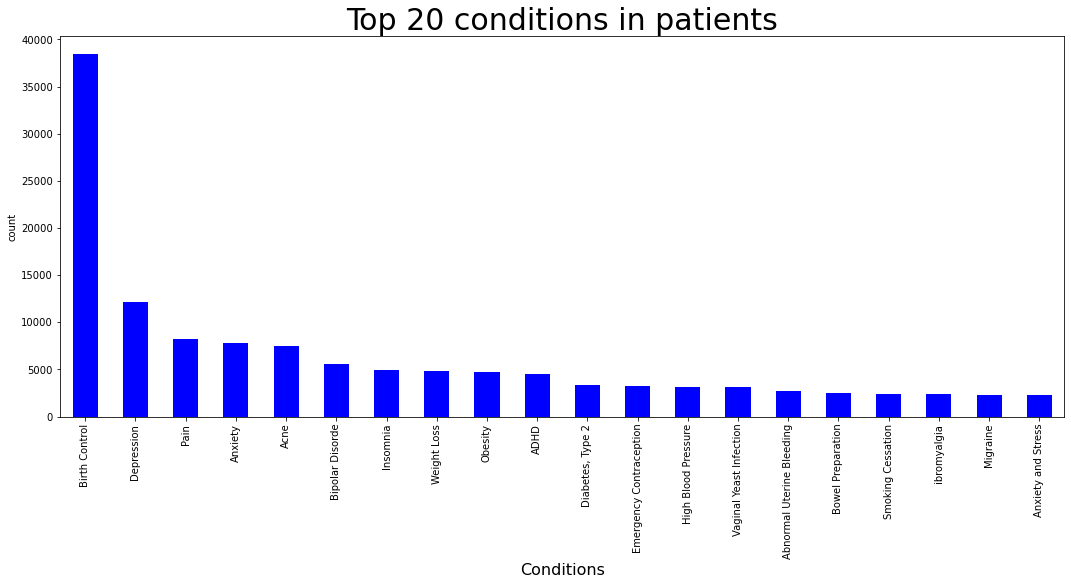

In [11]:
#top 20 conditions
drug_data['condition'].value_counts().head(20).plot.bar(figsize = (18, 7), color = 'blue')
plt.title('Top 20 conditions in patients', fontsize = 30)
plt.xlabel('Conditions', fontsize = 16)
plt.ylabel('count')
plt.show()

In [12]:
#bottom 20 conditions
drug_data['condition'].value_counts().tail(20)

Hodgkin's Lymphoma                              1
Transverse Myelitis                             1
Neurotic Depression                             1
Microscopic polyangiitis                        1
30</span> users found this comment helpful.     1
26</span> users found this comment helpful.     1
63</span> users found this comment helpful.     1
Klinefelter Syndrome                            1
Gestational Diabetes                            1
Cluster-Tic Syndrome                            1
Sporotrichosis                                  1
54</span> users found this comment helpful.     1
Cogan's Syndrome                                1
AV Heart Block                                  1
Paragonimus westermani, Lung Fluke              1
Systemic Candidiasis                            1
Wilson's Disease                                1
unctional Gastric Disorde                       1
Sepsis                                          1
105</span> users found this comment helpful.    1


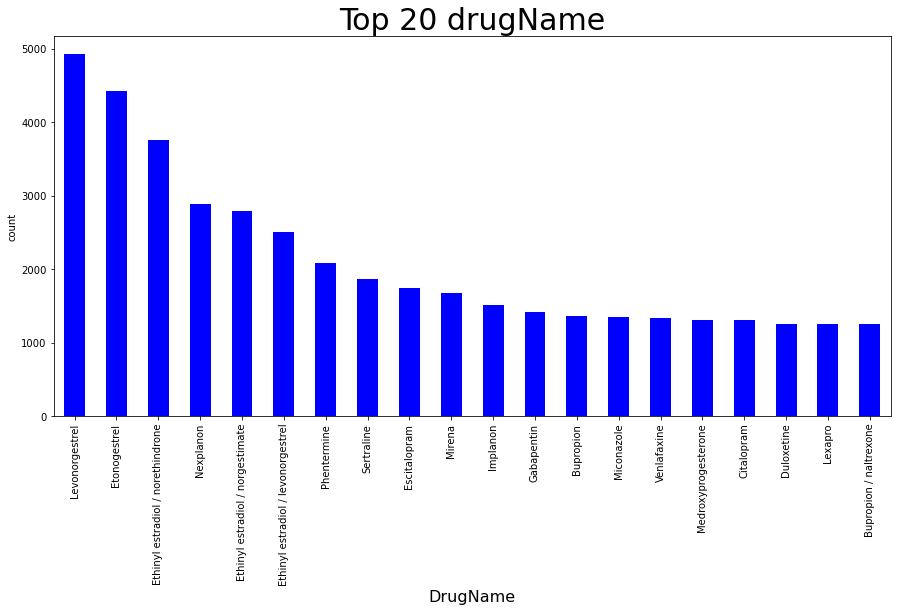

In [13]:
#top 20 drugs
drug_data['drugName'].value_counts().head(20).plot.bar(figsize = (15, 7), color = 'blue')
plt.title('Top 20 drugName', fontsize = 30)
plt.xlabel('DrugName', fontsize = 16)
plt.ylabel('count')
plt.show()

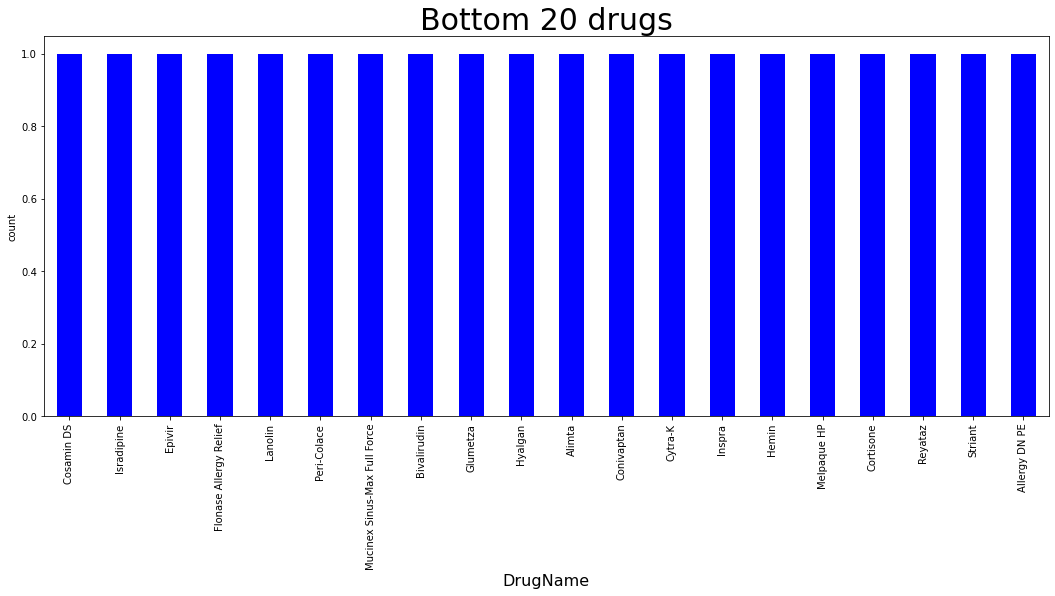

In [14]:
drug_data['drugName'].value_counts().tail(20).plot.bar(figsize = (18, 7), color = 'blue')
plt.title('Bottom 20 drugs', fontsize = 30)
plt.xlabel('DrugName', fontsize = 16)
plt.ylabel('count')
plt.show()

<AxesSubplot:>

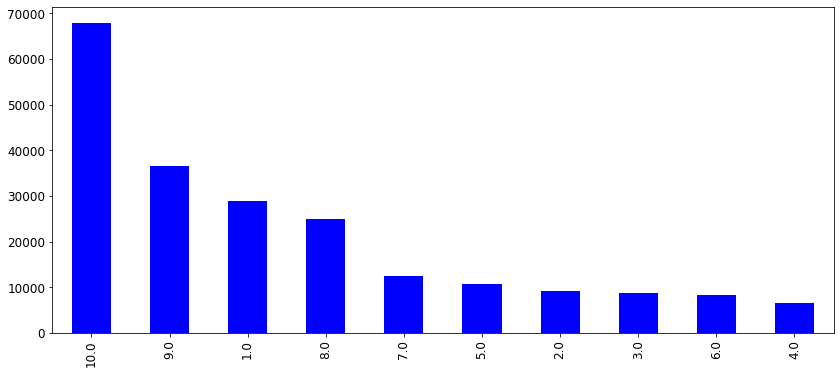

In [15]:
#group by rating
rating=drug_data['rating'].value_counts().sort_values(ascending=False)
rating.plot(kind="bar", figsize = (14,6), fontsize = 12,color="blue")

Text(0.5, 1.0, 'Top20 : The number of drugs per condition.')

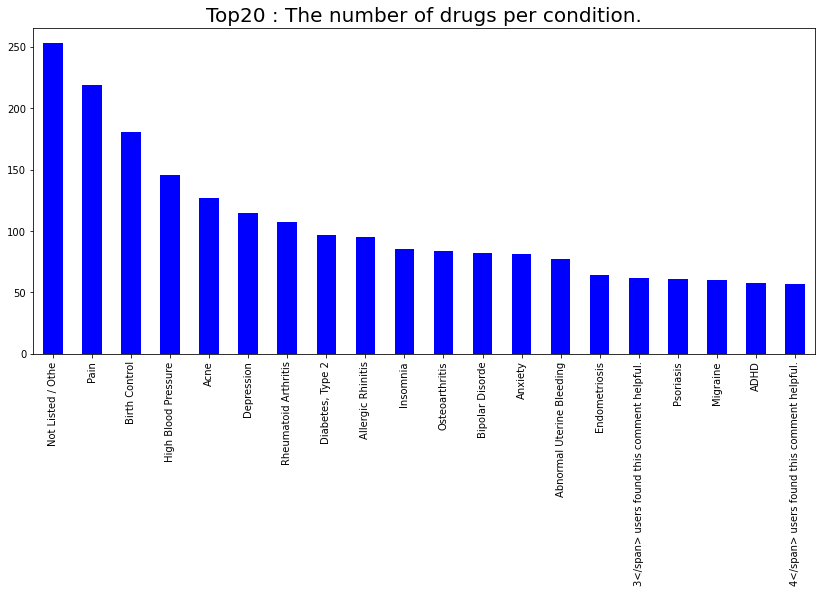

In [16]:
condition_dn = drug_data.groupby(['condition'])['drugName'].nunique().sort_values(ascending=False)
condition_dn[0:20].plot(kind="bar", figsize = (14,6), fontsize = 10,color="blue")
plt.xlabel("", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Top20 : The number of drugs per condition.", fontsize = 20)

In [17]:
#group drugs per condition
drug_data.groupby('condition')['drugName'].nunique().sort_values(ascending=False).head(20)

condition
Not Listed / Othe                             253
Pain                                          219
Birth Control                                 181
High Blood Pressure                           146
Acne                                          127
Depression                                    115
Rheumatoid Arthritis                          107
Diabetes, Type 2                               97
Allergic Rhinitis                              95
Insomnia                                       85
Osteoarthritis                                 84
Bipolar Disorde                                82
Anxiety                                        81
Abnormal Uterine Bleeding                      77
Endometriosis                                  64
3</span> users found this comment helpful.     62
Psoriasis                                      61
Migraine                                       60
ADHD                                           58
4</span> users found this comment helpfu

Text(0.5, 1.0, 'The Number of Drugs per Condition (top 20)')

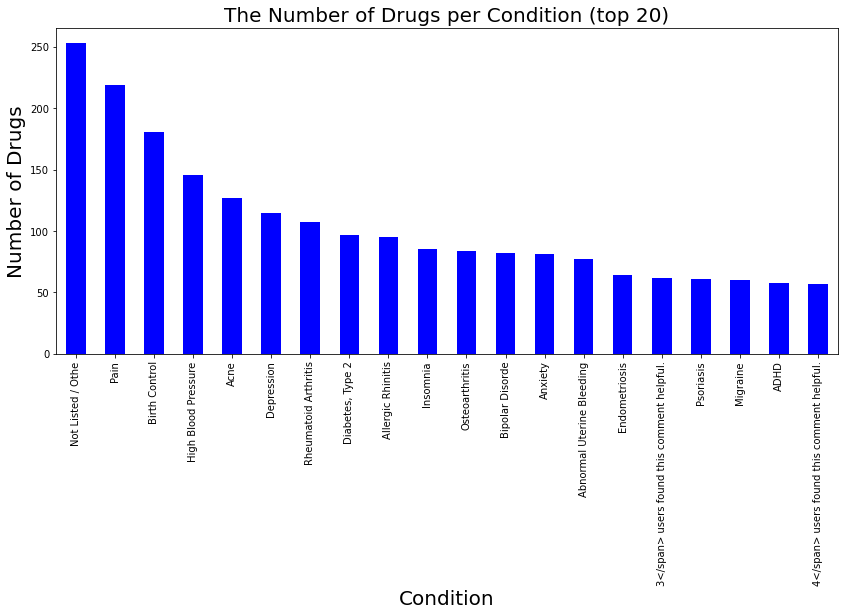

In [18]:
#drugs per conditions
conditions = drug_data.groupby(['condition'])['drugName'].nunique().sort_values(ascending=False)
conditions[0:20].plot(kind="bar", figsize = (14,6), fontsize = 10,color="blue")
plt.xlabel("Condition", fontsize = 20)
plt.ylabel("Number of Drugs", fontsize = 20)
plt.title("The Number of Drugs per Condition (top 20)", fontsize = 20)

In [19]:
#checking for null values
drug_data.isnull().sum()

ID                0
drugName          0
condition      1194
review            0
rating            0
date              0
usefulCount       0
dtype: int64

In [20]:
drug_data.dropna(subset=['condition'], inplace=True)

In [21]:
#remove noise from the data
span_data = drug_data[drug_data['condition'].str.contains('</span>',case=False,regex=True) == True]
print('Number of rows with </span> values : ', len(span_data))
noisy_data_ = 100 * (len(span_data)/drug_data.shape[0])
print('Total percent of noisy data {} %  '.format(noisy_data_))


Number of rows with </span> values :  1171
Total percent of noisy data 0.5475314327929715 %  


In [22]:
#drop the noise data
drug_data.drop(span_data.index, axis = 0, inplace=True)

In [23]:
drug_data.isnull().sum()

ID             0
drugName       0
condition      0
review         0
rating         0
date           0
usefulCount    0
dtype: int64

In [24]:
#check the conditions that have not been listed/other conditions
not_listed = drug_data[drug_data['condition'].str.contains('not listed / othe',case=False,regex=True) == True] 
print('Number of not_listed values : ', len(not_listed))
percent_not_listed = 100 * len(not_listed)/drug_data.shape[0]
print('Total percent of data :  {} %  '.format(percent_not_listed))

Number of not_listed values :  590
Total percent of data :  0.27813657920292656 %  


In [25]:
#drop the unlisted/other conditions
drug_data.drop(not_listed.index, axis = 0, inplace=True)

In [26]:
#check the shape of the data
drug_data.shape

(211247, 7)

# Text Preprocessing

In [27]:
#libraries to be used for preprocessing
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.base import BaseEstimator , TransformerMixin
from bs4 import BeautifulSoup
from wordcloud import WordCloud, STOPWORDS
import re
import pickle
from functools import reduce
from nltk.stem.snowball import SnowballStemmer
import vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nancy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Review Preprocessing

Preprocessing will include 3 Steps
Pipeline 1
1.create a pipeline that is used to extract Clean text which will be used for rating labeling.
Remove html
strip text
remove stopwords
replace special characters
filter out uncommon symbols
combine whitespace
lower text
stemming(snowball stemmer)
pipeline 2
Strip html
strip text



In [28]:
#check for the first 2 reviews
for i in drug_data['review'][0:2]:
    print(i,'\n')


"It has no side effect, I take it in combination of Bystolic 5 Mg and Fish Oil" 

"My son is halfway through his fourth week of Intuniv. We became concerned when he began this last week, when he started taking the highest dose he will be on. For two days, he could hardly get out of bed, was very cranky, and slept for nearly 8 hours on a drive home from school vacation (very unusual for him.) I called his doctor on Monday morning and she said to stick it out a few days. See how he did at school, and with getting up in the morning. The last two days have been problem free. He is MUCH more agreeable than ever. He is less emotional (a good thing), less cranky. He is remembering all the things he should. Overall his behavior is better. 
We have tried many different medications and so far this is the most effective." 



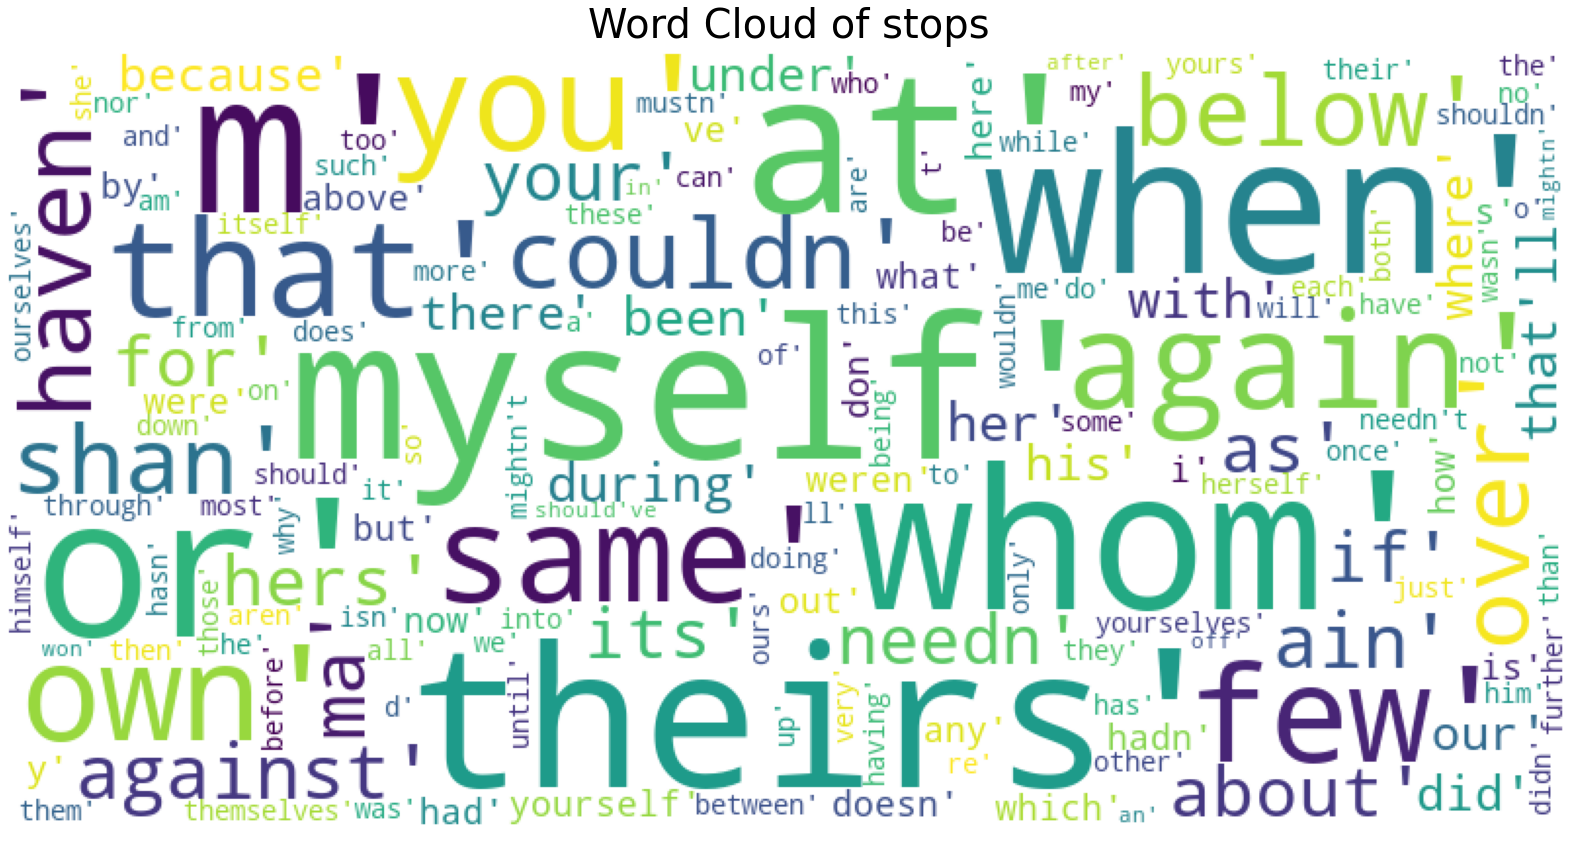

In [29]:
#check the words used as stopwords.In this case we will use word-cloud
def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(22.0,15.0), 
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'one', 'br', 'Po', 'th', 'sayi', 'fo', 'Unknown'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='white',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=800, 
                    height=400,
                    mask = mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  
stops = set(stopwords.words('english'))
plot_wordcloud(stops, title="Word Cloud of stops")

In [30]:
#remove words that include not
stops = set(stopwords.words('english'))

neg_list = ["aren't","couldn't","didn't","doesn't","don't","hadn't","hasn't","haven't","isn't","mightn't",
            "mustn't","needn't","no","nor","not","shan't","shouldn't","wasn't","weren't","wouldn't"]
for i in neg_list:
    stops.remove(i)

In [31]:
#preprocessing pipeline 1

class CleanText(BaseEstimator, TransformerMixin):
     # Remove HTML tags 
    def strip_html(self, text):
        soup = BeautifulSoup(text, "html.parser")
        return soup.get_text()

     #strip text(removes left orright spacing including carriage return)
    
    def strip_text(self, text):
        return text.strip()
    
     # Remove English Stop words
    def stopwords(self, text):
        stop_words = set(nltk.corpus.stopwords.words('english'))     
        stop_words_no_neg = stop_words - set(neg_list)
        text = ' '.join([word for word in text.split() if word not in stop_words_no_neg ])
        return text 
   #replace special characters
    def replace_special_characters(self, text):
        return re.compile('[/(){}\[\]\|@,;:.#+_?!"$%&@~]\t').sub('', text)
    #filter uncommon symbols
    def filter_out_uncommon_symbols(self, text):
        return re.compile('[^0-9a-zA-Z ]').sub(' ', text)
    #combine whitespaces(removes multiple whitespaces)
    def combine_whitespace(self, text):
        return re.compile(r"\s+").sub(" ", text).strip()
    #lower the text (to lowercase)
    def lower(self, text):
        return text.lower()
    #stemming
    def stemming(self, text):
        stemmer = SnowballStemmer('english')
        text = ' '.join(stemmer.stem(token) for token in nltk.word_tokenize(text))
        return text
    def fit(self, X, y=None, **fit_params):
        return self
    #pipeline 1
    def transform(self, X, **transform_params):
        clean_X = X.apply(self.strip_html)\
        .apply(self.strip_text)\
        .apply(self.stopwords)\
        .apply(self.replace_special_characters)\
        .apply(self.filter_out_uncommon_symbols)\
        .apply(self.combine_whitespace)\
        .apply(self.lower)\
        .apply(self.stemming)
        return clean_X
    #pipeline 2
    def transform_vader(self, X, **transform_params):
        clean_X = X.apply(self.strip_html)\
        .apply(self.strip_text)
        return clean_X

    
        


In [32]:
%%time
ct = CleanText()
drug_data['clean_text'] = ct.fit(drug_data.review).transform(drug_data.review)

Wall time: 9min 36s


In [33]:
%%time
ct = CleanText()
drug_data['VADER_clean_text'] = ct.fit(drug_data.review).transform_vader(drug_data.review)


Wall time: 33.5 s


In [34]:
#choose the columns to remain
drug_data = drug_data[['rating', 'clean_text', 'VADER_clean_text']]

In [35]:
drug_data.head()

,rating,clean_text,VADER_clean_text
0,9.0,it no side effect i take combin bystol 5 mg fi...,"""It has no side effect, I take it in combinati..."
1,8.0,my son halfway fourth week intuniv we becam co...,"""My son is halfway through his fourth week of ..."
2,5.0,i use take anoth oral contracept 21 pill cycl ...,"""I used to take another oral contraceptive, wh..."
3,8.0,this first time use form birth control i m gla...,"""This is my first time using any form of birth..."
4,9.0,suboxon complet turn life around i feel health...,"""Suboxone has completely turned my life around..."


In [36]:
drug_data['sentiment_rating'] = drug_data["rating"].apply(lambda x: 1 if x > 5 else 0)

In [37]:
#label using VADER Based
analyzer = SentimentIntensityAnalyzer()

In [38]:
drug_data['VADER_sentiment'] = drug_data['VADER_clean_text'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

In [39]:
positive_num = len(drug_data[drug_data['VADER_sentiment'] >=0.00])
negative_num = len(drug_data[drug_data['VADER_sentiment'] <-0.00])
positive_num, negative_num

(108563, 102684)

In [40]:
#map the values to positice and negative(1,0)
drug_data['VADER_sentiment']= drug_data['VADER_sentiment'].map(lambda x:int(1) if x>=0.00 else int(0) )

In [41]:
drug_data.head(5)

,rating,clean_text,VADER_clean_text,sentiment_rating,VADER_sentiment
0,9.0,it no side effect i take combin bystol 5 mg fi...,"""It has no side effect, I take it in combinati...",1,0
1,8.0,my son halfway fourth week intuniv we becam co...,"""My son is halfway through his fourth week of ...",1,1
2,5.0,i use take anoth oral contracept 21 pill cycl ...,"""I used to take another oral contraceptive, wh...",0,1
3,8.0,this first time use form birth control i m gla...,"""This is my first time using any form of birth...",1,1
4,9.0,suboxon complet turn life around i feel health...,"""Suboxone has completely turned my life around...",1,1


In [42]:
#compare the sentiment between each review
count_differences = len(drug_data.query('VADER_sentiment != sentiment_rating'))
print("There are {} different values".format(count_differences))
print("The percentage of different values is {:.1f} %".format(((count_differences/drug_data.shape[0])*100)))

There are 75256 different values
The percentage of different values is 35.6 %


In [43]:
differences = drug_data.query('VADER_sentiment != sentiment_rating')

In [44]:
#store the data to be used in clssifiers
drug_data = drug_data[['clean_text',  'sentiment_rating']]
drug_data

,clean_text,sentiment_rating
0,it no side effect i take combin bystol 5 mg fi...,1
1,my son halfway fourth week intuniv we becam co...,1
2,i use take anoth oral contracept 21 pill cycl ...,0
3,this first time use form birth control i m gla...,1
4,suboxon complet turn life around i feel health...,1
...,...,...
53761,i taken tamoxifen 5 year side effect sever swe...,1
53762,i ve take lexapro escitaploprgram sinc februar...,1
53763,i m marri 34 year old i no kid take pill hassl...,1
53764,i prescrib nucynta sever neck shoulder pain af...,0


In [45]:
# Save clean dataset 
filename = 'drug_data.p'
with open(filename, 'wb') as outfile:
    pickle.dump(drug_data, outfile)

In [46]:
#calculate confidence level of significant test
def get_confidence_interval(n, acc, alpha):
    #n=cardinality of the test
    #acc= accuracy of the model
    # alpha = significance level confidence level = 1-alpha
     # Compute confidence level 
    conf_level = 1-alpha
    # Retrieve the value of Z for the specified confidence level
    Z = scipy.stats.norm.ppf((1+conf_level)/2)
    # Compute p_min and p_max
    first_num = (2*n*acc) + pow(Z,2)
    second_num = Z * math.sqrt(pow(Z,2)+(4*n*acc)-(4*n*pow(acc,2)))
    den = 2*(n+pow(Z,2))
    p_min = (first_num - second_num) / den
    p_max = (first_num + second_num) / den
    # Round p_min and p_max to a precision of 3 in decimal digits
    return [round(p_min,3), round(p_max,3)]
        

In [47]:
#compare the 2 models
def compare_two_models(n1, e1, n2, e2, alpha):
    #n1=cardinality of test fir model 1
    #e1=error obtained for first model(1-accuracy)
    #n2=cardinality of test for model 2
    #e2 = error for model 2
    #alpha= significance level
    # Compute confidence level
    conf_level = 1-alpha

    # Retrieve the value of Z for the specified confidence level
    Z = scipy.stats.norm.ppf((1+conf_level)/2)
  
    # Compute the approximated variance of the models
    var = (e1*(1-e1)/n1) + (e2*(1-e2)/n2) 

    # Compute the absolute difference between the errors 
    d = abs(e1 - e2)

    # Compute d_t 
    d_t_min = d-(Z*math.sqrt(var))
    d_t_max = d+(Z*math.sqrt(var))

    # Compute the interval
    iv = pd.Interval(left=d_t_min, right=d_t_max)

    if 0 in iv:
        zero = True
        print("The interval contains 0, so the difference between the 2 models is not statistically significant")
    else: 
        zero = False
        print("The interval does NOT contain 0, so the difference between the 2 models is statistically significant")
  
     # Compute the confidence threshold to accept the hypothesis that 
     # the difference between the models becomes statistically significant 
     # if the difference is not statistically significant (i.e interval contains 0)
    if 0 in iv: 
        Z_sign = (d/(math.sqrt(var)))
        alpha_sign =  2*(1-(scipy.stats.norm.cdf(Z_sign)))
        conf_sign = 1-alpha_sign
        print("The difference becomes significant when the confidence is < {}".format(round(conf_sign,3)))
        return [d_t_min, d_t_max, zero, conf_sign]
    else: 
        return [d_t_min, d_t_max, zero]

In [48]:
#setting grid search parameters
#vectorize the parameters
ngram_range = [(1,1), (1,2), (1,3)]
max_df = [0.75]
analyzer = ['word', 'char']

grid_vec = {'ngram_range': ngram_range,
            'max_df': max_df,
            'analyzer': analyzer
            }
# Parameters for MultinomialNB
alpha = [tuple(np.linspace(0.5,1,10))]
grid_clf_nb = {'alpha': alpha}
#the parameters for both logistic and random forest remain unchanged
 

perfom customized grid search
parameters:
clf-classification algorithm
vectorizer_flag-identifies the vectorizer one would like to use
flag_clf-identifies the classifier that you want to use
train_corpus: training data (X_train)
test_corpus: testing data (X_test)
train label: training labels (Y_train)
test_label: testing labels (Y_test)
params_vec: ParameterGrid containing the parameters for the Vectorizer 
param_grid_clf: ParameterGrid containing the parameters for MultinomialNB
Reurn
params_dict: {id_experiment : parameters of vectorizer + classification 
                                  algorithms in that experiment}
results_dict:{id_experiment : F1-score obtained on test_corpus}

In [49]:
def grid_search(clf, vectorizer_flag, flag_clf, train_corpus, test_corpus,
                train_label, test_label, params_vec, param_grid_clf=None):
    
    params_dict = {}
    results_dict = {}
    vectorizer_params = params_vec 

    # Routine
    i = 0
    for i, params in enumerate(param_grid_vec):
        exp_id = i+1
        print("Exp_{}".format(exp_id))

    if vectorizer_flag == 'count':
        vectorizer = CountVectorizer(ngram_range = params['ngram_range'], 
                                  max_df = params['max_df'], 
                                  analyzer = params['analyzer']
                                    )
    elif vectorizer_flag == 'tfidf': 
         vectorizer = TfidfVectorizer(ngram_range = params['ngram_range'], 
                                max_df = params['max_df'], 
                                analyzer = params['analyzer']
                                )
    
    print("   Vectorizer:")
    vectorizer_params = vectorizer.get_params()
    print("   ",vectorizer_params['ngram_range'], 
          vectorizer_params['analyzer'])
    
    print("   Vectorization...")
    # Training set
    X_train = vectorizer.fit_transform(train_corpus)
    Y_train = np.array(train_label.tolist())

    # Test set
    X_test = vectorizer.transform(test_corpus)
    Y_test = np.array(test_label.tolist())

    # Classifier
    classifier = clf

    # GridSearch on clf 
    if clf_flag == 'nb': 
        grid_search = GridSearchCV(classifier, param_grid_clf, cv = 5, scoring = "f1_macro", refit = True, n_jobs=-1)


        # Grid Search
        print("   Performing grid search...")
        print("   \nParameters:", list(param_grid_clf))
        t0 = time()
        grid_search.fit(X_train, Y_train)
        print("\nDone in %0.3fs" % (time() - t0))
        print()

        # Extract best parameter for MultinomialNB
        best_clf_params = grid_search.best_params_

        # Extract best classifier 
        best_clf = grid_search.best_estimator_


        # Save parameters for the current experiment 
        params_dict["Exp_{}".format(exp_id)] = (vectorizer_params['ngram_range'], 
                                                vectorizer_params['analyzer'],
                                                best_clf_params)
         
    else: 
        best_clf = classifier
        best_clf.fit(X_train, Y_train)

        # Save parameters for the current experiment   
        params_dict["Exp_{}".format(exp_id)] = (vectorizer_params['ngram_range'], 
                                                vectorizer_params['analyzer'])
    
         

    # Testing
    print("   Testing...")
    pred = best_clf.predict(X_test) #predict the sentiment for test data
    accuracy = best_clf.score(X_test, Y_test)
    f1 = f1_score(Y_test, pred)
    print("Accuracy: %s" % str(accuracy)) #check accuracy
    print("F1-macro: %s" % str(f1))
    results_dict["Exp_{}".format(exp_id)] = f1
      
    print()

    # Last experiment: default parameters for vectorizer and classifier
    exp_id = i + 2
    print("Exp_{}".format(exp_id))

    if vectorizer_flag == 'count':
        vectorizer = CountVectorizer()
    else: 
        vectorizer = TfidfVectorizer()

   # Training set
    X_train = vectorizer.fit_transform(train_corpus)
    Y_train = np.array(train_label.tolist())

    # Test set
    X_test = vectorizer.transform(test_corpus)
    Y_test = np.array(test_label.tolist())

    # Classifier
    if clf_flag == 'nb': 
        clf = MultinomialNB().fit(X_train, Y_train) 
    elif clf_flag == 'lr':
        clf = LogisticRegression(max_iter=10000,n_jobs = -1).fit(X_train, Y_train) 
    elif clf_flag == 'rf':
         clf = RandomForestClassifier(n_estimators=100, n_jobs = -1, verbose = 0).fit(X_train, Y_train) 
    else: 
        print("Error")
        pred = clf.predict(X_test) 
        accuracy = clf.score(X_test, Y_test)
        f1 = f1_score(Y_test, pred)
        print("Accuracy: %s" % str(accuracy)) 
        print("F1-macro: %s" % str(f1))
        results_dict["Exp_{}".format(exp_id)] = f1
        params_dict["Exp_{}".format(exp_id)] = ('DEFAULT', 'DEFAULT')
  
        print("\n\nDone.")
  
    return params_dict, results_dict
    
    

In [50]:
#corpus
corpus = drug_data['clean_text']

In [51]:
#set dependent feature as sentiment
sentiment = drug_data['sentiment_rating']

In [52]:
#split the data
train_corpus, test_corpus, train_label, test_label = train_test_split(corpus,sentiment,test_size=0.20,random_state=42)
print('Train data shape ',train_corpus.shape, train_label.shape)
print('Test data shape ', test_corpus.shape, test_label.shape)

Train data shape  (168997,) (168997,)
Test data shape  (42250,) (42250,)


In [53]:
vectorizer_flag = 'count'
clf_flag = 'nb'
# Build the param grid
param_grid_vec = ParameterGrid(grid_vec)
param_grid_clf = ParameterGrid(grid_clf_nb)
# Save parameters corresponding to a given experiment 
params_vec_nb = {}
# Results record
results_nb = {}

params_vec_nb, results_nb = grid_search(MultinomialNB(), 
                                        vectorizer_flag, clf_flag, train_corpus, 
                                        test_corpus, train_label, test_label, 
                                        param_grid_vec, param_grid_clf)

Exp_1
Exp_2
Exp_3
Exp_4
Exp_5
Exp_6
   Vectorizer:
    (1, 3) char
   Vectorization...
   Performing grid search...
   
Parameters: [{'alpha': (0.5, 0.5555555555555556, 0.6111111111111112, 0.6666666666666666, 0.7222222222222222, 0.7777777777777778, 0.8333333333333333, 0.8888888888888888, 0.9444444444444444, 1.0)}]

Done in 53.701s

   Testing...
Accuracy: 0.7282840236686391
F1-macro: 0.7937477542220626

Exp_7


In [54]:
#extract the best parameters
# Extract best parameters 
best_accuracy = max(results_nb.values())
for k, v in results_nb.items():
    if v == best_accuracy: 
        best_index = k  
best_parameters_nb = params_vec_nb[best_index]
print("Best parameters for CountVectorizer + MultinomialNB: ngram_range = {}, analyzer  = {}, alpha = {}".format(best_parameters_nb[0],
                                                                                                                best_parameters_nb[1],
                                                                                                                best_parameters_nb[2]) )

Best parameters for CountVectorizer + MultinomialNB: ngram_range = (1, 3), analyzer  = char, alpha = {'alpha': 0.5555555555555556}


In [55]:
#run the best model
# Best model 
vectorizer =  CountVectorizer(ngram_range = best_parameters_nb[0],
                              analyzer = best_parameters_nb[1])
# Training set
X_train = vectorizer.fit_transform(train_corpus)
Y_train = np.array(train_label.tolist())

# Test set
X_test = vectorizer.transform(test_corpus)
Y_test = np.array(test_label.tolist())

alpha = best_parameters_nb[2]

# Classifier
clf = MultinomialNB(alpha = alpha['alpha']).fit(X_train, Y_train) 
pred = clf.predict(X_test) 
accuracy = clf.score(X_test, Y_test)
f1 = f1_score(Y_test, pred)
print("F1-macro: %s" % str(f1))
print("Accuracy: %s" % str(accuracy)) 

F1-macro: 0.7919024267571986
Accuracy: 0.7257988165680473


In [56]:
#confidence interval for model accuracy
# Confidence interval for the best model accuracy
conf_int = get_confidence_interval(X_test.shape[0], accuracy, 0.05)
print(conf_int)

[0.722, 0.73]


Logistic Regression

In [57]:
vectorizer_flag = 'count'
clf_flag = 'lr'

# Build the param grid
param_grid_vec = ParameterGrid(grid_vec)

# Save parameters corresponding to a given experiment 
params_vec_lr = {}

# Results record
results_lr = {}

params_vec_lr, results_lr = grid_search(LogisticRegression(max_iter=10000,n_jobs = -1), 
                                        vectorizer_flag, clf_flag, train_corpus, 
                                        test_corpus, train_label, test_label, 
                                        param_grid_vec)

Exp_1
Exp_2
Exp_3
Exp_4
Exp_5
Exp_6
   Vectorizer:
    (1, 3) char
   Vectorization...
   Testing...
Accuracy: 0.8283076923076923
F1-macro: 0.8813581498806057

Exp_7


In [58]:
# Extract best parameters 
best_accuracy = max(results_lr.values())
for k, v in results_lr.items():
    if v == best_accuracy: 
        best_index = k
best_parameters_lr = params_vec_lr[best_index]
print("Best parameters for CountVectorizer + Logistic Classifier: ngram_range = {}, analyzer  = {}".format(best_parameters_lr[0],
                                                                                                                best_parameters_lr[1]))

Best parameters for CountVectorizer + Logistic Classifier: ngram_range = (1, 3), analyzer  = char


In [59]:
# Best model 
vectorizer =  CountVectorizer(ngram_range = best_parameters_lr[0],
                              analyzer = best_parameters_lr[1])
# Training set
X_train = vectorizer.fit_transform(train_corpus)
Y_train = np.array(train_label.tolist())

# Test set
X_test = vectorizer.transform(test_corpus)
Y_test = np.array(test_label.tolist())

# Classifier
clf = LogisticRegression(max_iter=100000, n_jobs = -1).fit(X_train, Y_train) 
pred = clf.predict(X_test) 
accuracy = clf.score(X_test, Y_test)
f1 = f1_score(Y_test, pred)
print("F1-macro: %s" % str(f1))
print("Accuracy: %s" % str(accuracy))

F1-macro: 0.8810509267590425
Accuracy: 0.827905325443787


In [60]:
# Confidence interval 
conf_int = get_confidence_interval(X_test.shape[0], accuracy, 0.05)
print(conf_int)

[0.824, 0.831]


Random Forest

In [61]:
vectorizer_flag = 'count'
clf_flag = 'rf'
# Build the param grid
param_grid_vec = ParameterGrid(grid_vec)

# Save parameters corresponding to a given experiment  
params_vec_rf = {}

# Results record
results_rf = {}

params_vec_rf, results_rf = grid_search(RandomForestClassifier(), 
                                        vectorizer_flag, clf_flag, train_corpus, 
                                        test_corpus, train_label, test_label, 
                                        param_grid_vec,param_grid_clf)

Exp_1
Exp_2
Exp_3
Exp_4
Exp_5
Exp_6
   Vectorizer:
    (1, 3) char
   Vectorization...
   Testing...
Accuracy: 0.9083313609467456
F1-macro: 0.9384055089934636

Exp_7


In [62]:
# extract best parameters 
best_accuracy = max(results_rf.values())
for k, v in results_rf.items():
    if v == best_accuracy: 
        best_index = k  
best_parameters_rf = params_vec_rf[best_index]
print("Best parameters for CountVectorizer + Random Forest Classifier: ngram_range = {}, analyzer  = {}".format(best_parameters_rf[0],
                                                                                                                                 best_parameters_rf[1]))

Best parameters for CountVectorizer + Random Forest Classifier: ngram_range = (1, 3), analyzer  = char


In [ ]:
# Best model 
vectorizer =  CountVectorizer(ngram_range = best_parameters_lr[0],
                              analyzer = best_parameters_lr[1])
# Training set
X_train = vectorizer.fit_transform(train_corpus)
Y_train = np.array(train_label.tolist())

# Test set
X_test = vectorizer.transform(test_corpus)
Y_test = np.array(test_label.tolist())


# Classifier
clf =  RandomForestClassifier(n_estimators=100, n_jobs = -1, verbose = 0).fit(X_train, Y_train) 
pred = clf.predict(X_test) 
accuracy = clf.score(X_test, Y_test)
f1 = f1_score(Y_test, pred)
print("F1-macro: %s" % str(f1))
print("Accuracy: %s" % str(accuracy)) 

In [ ]:
# Confidence interval for the best model accuracy
conf_int = get_confidence_interval(X_test.shape[0], accuracy, 0.05)
print(conf_int)

TF-IDF

In [ ]:
corpus = drug_data['clean_text']

In [ ]:
# Store dependent feature in sentiment 
sentiment = drug_data['sentiment_rating']
sentiment.shape

In [ ]:
# Split the data into train and test
train_corpus, test_corpus, train_label, test_label = train_test_split(corpus,sentiment,test_size=0.20,random_state=42)
print('Train data shape ',train_corpus.shape, train_label.shape)
print('Test data shape ', test_corpus.shape, test_label.shape)

Multinomial Naive Bayes

In [ ]:
vectorizer_flag = 'tfidf'
clf_flag = 'nb'
# Build the param grid
param_grid_vec = ParameterGrid(grid_vec)
param_grid_clf = ParameterGrid(grid_clf_nb)
# Save parameters corresponding to a given experiment 
params_vec_nb = {}
# Results record
results_nb = {}

params_vec_nb, results_nb = grid_search(MultinomialNB(), 
                                        vectorizer_flag, clf_flag, train_corpus, 
                                        test_corpus, train_label, test_label, 
                                        param_grid_vec, param_grid_clf)

In [ ]:
 #Extract best parameters 
best_accuracy = max(results_nb.values())
for k, v in results_nb.items():
    if v == best_accuracy: 
        best_index = k  
best_parameters_nb = params_vec_nb[best_index]
print("Best parameters for TfidfVectorizer + MultinomialNB: ngram_range = {}, analyzer  = {}, alpha = {}".format(best_parameters_nb[0],
                                                                                                                best_parameters_nb[1],
                                                                                                                best_parameters_nb[2]) )

In [ ]:
# Best model 
vectorizer =  TfidfVectorizer(ngram_range = best_parameters_nb[0],
                              analyzer = best_parameters_nb[1])
# Training set
X_train = vectorizer.fit_transform(train_corpus)
Y_train = np.array(train_label.tolist())

# Test set
X_test = vectorizer.transform(test_corpus)
Y_test = np.array(test_label.tolist())

alpha = best_parameters_nb[2]

# Classifier
clf = MultinomialNB(alpha = alpha['alpha']).fit(X_train, Y_train) 
pred = clf.predict(X_test) 
accuracy = clf.score(X_test, Y_test)
f1 = f1_score(Y_test, pred)
print("F1-macro: %s" % str(f1))
print("Accuracy: %s" % str(accuracy)) 

In [ ]:
# Confidence interval for the best model accuracy
conf_int = get_confidence_interval(X_test.shape[0], accuracy, 0.05)
print(conf_int)

Logistic Regression

In [ ]:
vectorizer_flag = 'tfidf'
clf_flag = 'lr'

# Build the param grid
param_grid_vec = ParameterGrid(grid_vec)

# Save parameters corresponding to a given experiment 
params_vec_lr = {}

# Results record
results_lr = {}

params_vec_lr, results_lr = grid_search(LogisticRegression(max_iter=100000, n_jobs = -1), 
                                        vectorizer_flag, clf_flag, train_corpus, 
                                        test_corpus, train_label, test_label, 
                                        param_grid_vec)

In [ ]:
# Extract best parameters 
best_accuracy = max(results_lr.values())
for k, v in results_lr.items():
    if v == best_accuracy: 
        best_index = k  
best_parameters_lr = params_vec_lr[best_index]
print("Best parameters for TfidfVectorizer + Logistic Classifier: ngram_range = {}, analyzer  = {}".format(best_parameters_lr[0],
                                                                                                                best_parameters_lr[1]))

In [ ]:
# Best model 
vectorizer =  TfidfVectorizer(ngram_range = best_parameters_lr[0],
                              analyzer = best_parameters_lr[1])
# Training set
X_train = vectorizer.fit_transform(train_corpus)
Y_train = np.array(train_label.tolist())

# Test set
X_test = vectorizer.transform(test_corpus)
Y_test = np.array(test_label.tolist())

# Classifier
clf = LogisticRegression(max_iter=10000, n_jobs = -1).fit(X_train, Y_train) 
pred = clf.predict(X_test) 
accuracy = clf.score(X_test, Y_test)
f1 = f1_score(Y_test, pred)
print("F1-macro: %s" % str(f1))
print("Accuracy: %s" % str(accuracy)) 

In [ ]:
# confidence interval 
conf_int = get_confidence_interval(X_test.shape[0], accuracy, 0.05)
print(conf_int)

Random Forest


In [ ]:
vectorizer_flag = 'tfidf'
clf_flag = 'rf'
# Build the param grid
param_grid_vec = ParameterGrid(grid_vec)

# Save parameters corresponding to a given experiment 
params_vec_rf = {}

# Results record
results_rf = {}

params_vec_rf, results_rf = grid_search(RandomForestClassifier(n_estimators=100, n_jobs = -1, verbose = 0), 
                                        vectorizer_flag, clf_flag, train_corpus, 
                                        test_corpus, train_label, test_label, 
                                        param_grid_vec)

In [ ]:
# Extract best parameters 
best_accuracy = max(results_rf.values())
for k, v in results_rf.items():
    if v == best_accuracy: 
        best_index = k  
best_parameters_rf = params_vec_rf[best_index]
print("Best parameters for TfidfVectorizer + Random Forest Classifier: ngram_range = {}, analyzer  = {}".format(best_parameters_rf[0],
                                                                                                                best_parameters_rf[1]))

In [ ]:
# Best model 
vectorizer =  TfidfVectorizer()
# Training set
X_train = vectorizer.fit_transform(train_corpus)
Y_train = np.array(train_label.tolist())

# Test set
X_test = vectorizer.transform(test_corpus)
Y_test = np.array(test_label.tolist())


# Classifier
clf =  RandomForestClassifier(n_estimators=100, n_jobs = -1, verbose = 0).fit(X_train, Y_train) 
pred = clf.predict(X_test) 
accuracy = clf.score(X_test, Y_test)
f1 = f1_score(Y_test, pred)
print("F1-macro: %s" % str(f1))
print("Accuracy: %s" % str(accuracy)) 

In [ ]:
# confidence interval for the best model accuracy
conf_int = get_confidence_interval(X_test.shape[0], accuracy, 0.05)
print(conf_int)

The testing set is 42250 all through

In [ ]:
 #test setting
n1 = 42250
n2 = n1  
dict_models = {'1' : 0.7264, 
               '2' : 0.8279, 
               '3' : 0.90128,
               '4' : 0.7560, 
               '5' : 0.8207, 
               '6' : 0.8975,}

In [ ]:
res = {}
alpha = 0.05

# Compare models pairwise avoiding repetitions 
for k1, v1 in dict_models.items(): 
    for k2, v2 in dict_models.items(): 
        models = k1 + "-" + k2
        models_inverted = k2 + "-" + k1
    if k1 == k2: 
        continue
    elif models_inverted in res: 
        continue
      
    else: 
        print("*-*-*- MODELS *-*-*", models )
        res[models] = compare_two_models(n1, 1-v1, n2, 1-v2, alpha)
        print()

In [ ]:
res

In [ ]:
#sort the models as per the accuracy
sort_models = sorted(dict_models.items(), key=lambda x: x[1], reverse=True)
sort_models

In [ ]:
#run the best model
# Run of the best model among all
vectorizer =  CountVectorizer(ngram_range = (1,3),
                              analyzer = 'char')
# Training set
X_train = vectorizer.fit_transform(train_corpus)
Y_train = np.array(train_label.tolist())

# Test set
X_test = vectorizer.transform(test_corpus)
Y_test = np.array(test_label.tolist())

# Classifier
clf =  RandomForestClassifier(n_estimators=100, n_jobs = -1, verbose = 0, max_depth = 40).fit(X_train, Y_train) 
pred = clf.predict(X_test) 
accuracy = clf.score(X_test, Y_test)
f1 = f1_score(Y_test, pred)
print("F1-macro: %s" % str(f1))
print("Accuracy: %s" % str(accuracy)) 

In [ ]:
#confusion matrix of the best model
print(confusion_matrix(Y_test, pred))

In [ ]:
#classification report
print(classification_report(Y_test, pred))